In [48]:
from pathlib import Path
import os

def get_data(out_dir, barrier_delimeters=None, time_label='Avg time: '):
    out_dir = Path(out_dir)

    data = {}
    key = 'default'
    for out_file in os.listdir(out_dir):
        with open(out_dir / out_file) as f:
            lines = f.read().splitlines() # split to remove new lines
            for line in lines:

                if time_label in line:
                    x = int(Path(out_file).stem.split('_')[-1])
                    time = float(line.split(time_label)[1])

                    data.setdefault(key, []).append((x, time))
                elif barrier_delimeters and line in barrier_delimeters: # set to save data to right list for barrier
                    key = line

    for key in data:
        data[key].sort()
    
    return data    

In [71]:
import matplotlib.pyplot as plt

def plot(ax, x, y, label):
    ax.plot(x, y, label=label, alpha=0.5, marker='o')
    ax.legend()


## MPI

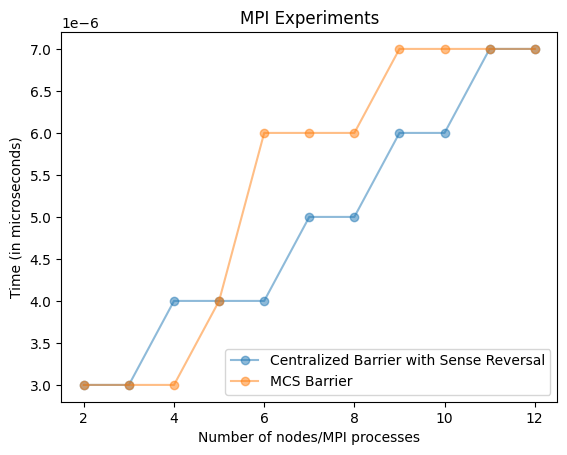

In [79]:

barrier1 = 'Centralized Barrier with Sense Reversal'
barrier2 = 'MCS Barrier'
combined_data = get_data('mpi/out_serial', barrier_delimeters=[barrier1, barrier2])

combined_x, combined_time = zip(*combined_data[barrier1])
tourney_x, tourney_time = zip(*combined_data[barrier2])

fig, ax = plt.subplots()
plot(ax, combined_x, combined_time, label=barrier1)
plot(ax, tourney_x, tourney_time, label=barrier2)

ax.set_xlabel('Number of nodes/MPI processes')
ax.set_ylabel('Time (in microseconds)')

ax.set_title('MPI Experiments')
plt.show()

## OpenMP

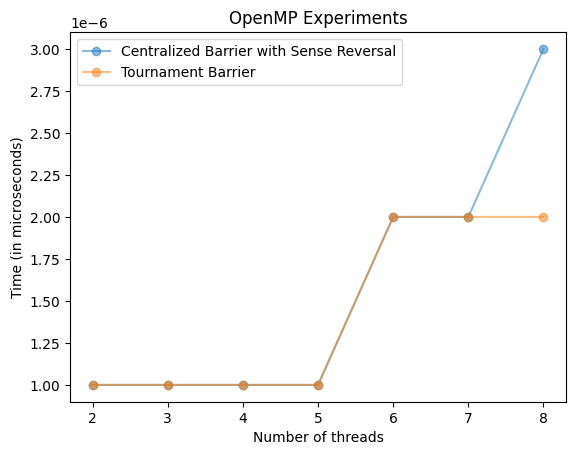

In [80]:

barrier1 = 'Centralized Barrier with Sense Reversal'
barrier2 = 'Tournament Barrier'
combined_data = get_data('omp/out_serial', barrier_delimeters=[barrier1, barrier2])

combined_x, combined_time = zip(*combined_data[barrier1])
tourney_x, tourney_time = zip(*combined_data[barrier2])

fig, ax = plt.subplots()
plot(ax, combined_x, combined_time, label=barrier1)
plot(ax, tourney_x, tourney_time, label=barrier2)

ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (in microseconds)')

ax.set_title('OpenMP Experiments')
plt.show()

## Combined

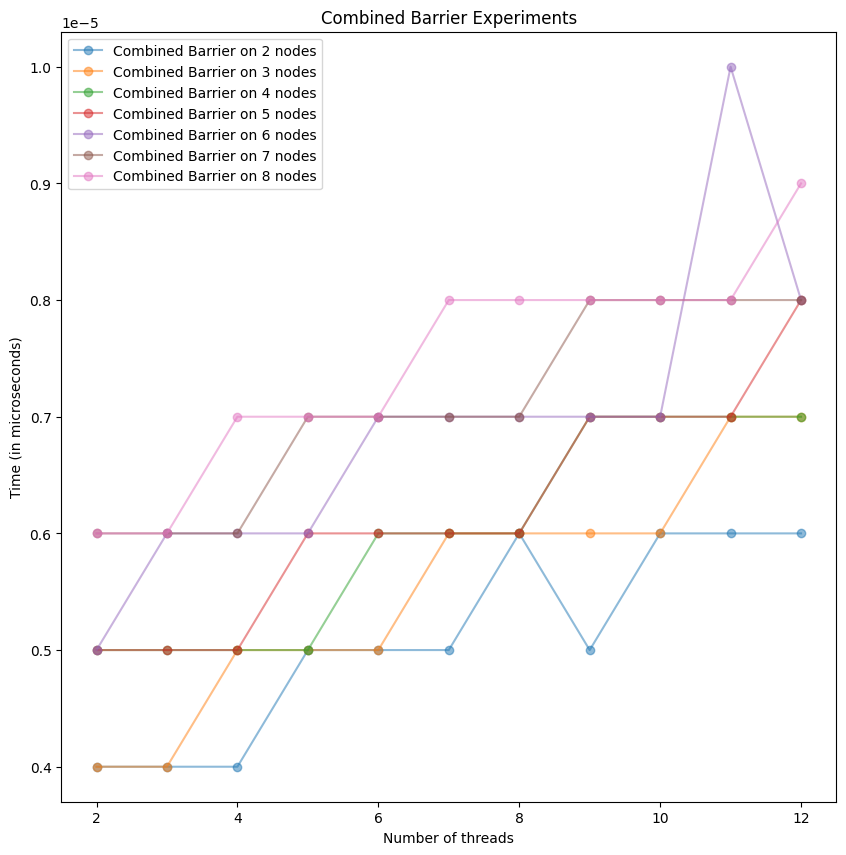

In [81]:

combined_data = get_data('combined/out_serial')

combined_x, combined_time = zip(*combined_data['default'])

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(2, 9):
    plot(ax, range(2, 13), combined_time[11 * (i - 2):11 * (i - 2) + 11], label=f'Combined Barrier on {i} nodes')

ax.set_xlabel('Number of threads')
ax.set_ylabel('Time (in microseconds)')

ax.set_title('Combined Barrier Experiments')
plt.show()

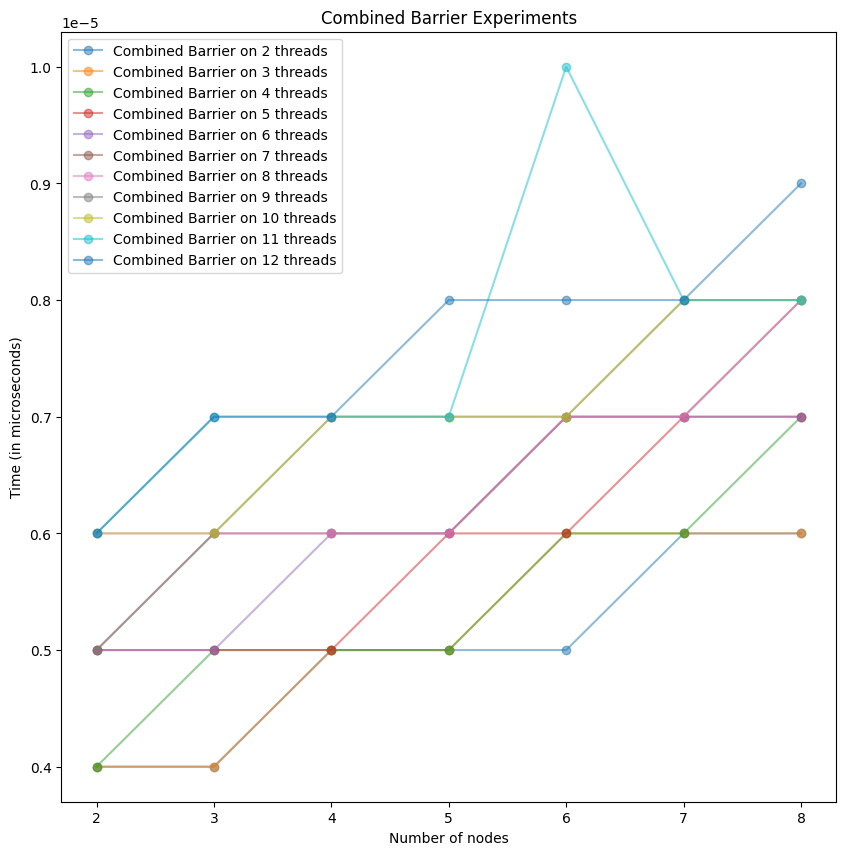

In [82]:

combined_data = get_data('combined/out_serial')

combined_x, combined_time = zip(*combined_data['default'])

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(2, 13):
    plot(ax, range(2, 9), combined_time[(i-2)::11], label=f'Combined Barrier on {i} threads')

ax.set_xlabel('Number of nodes')
ax.set_ylabel('Time (in microseconds)')

ax.set_title('Combined Barrier Experiments')
plt.show()

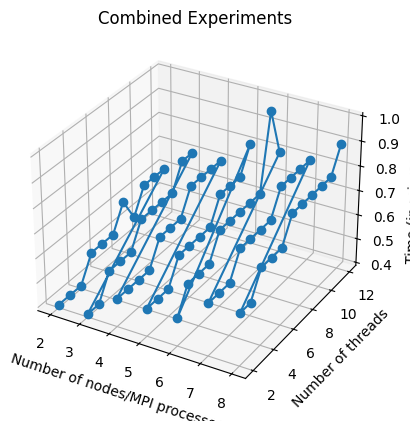

In [83]:

combined_data = get_data('combined/out_serial')

combined_x, combined_time = zip(*combined_data['default'])

combined_num_procs, combined_num_threads = [], []
for num_proc in range(2, 9):
    for num_thread in range(2, 13):
        combined_num_procs.append(num_proc)
        combined_num_threads.append(num_thread)

ax = plt.axes(projection='3d')
ax.plot3D(combined_num_procs, combined_num_threads, combined_time, label='Combined Barrier', **{'marker': 'o'})

ax.set_xlabel('Number of nodes/MPI processes')
ax.set_ylabel('Number of threads')
ax.set_zlabel('Time (in microseconds)')

ax.set_title('Combined Experiments')
plt.show()